# Exercise 5

- 이번 과제에서는 한국, 독일, 일본, 그리고 미국의 산업생산지수 data를 이용해 수업 시간에 다룬 여러 계량모형들에 대한 실습을 진행합니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/금융시장의빅데이터분석/7. Econometrics/Time_series_homework

/content/drive/MyDrive/Colab Notebooks/금융시장의빅데이터분석/7. Econometrics/Time_series_homework


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.formula.api import ols 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### (1) 국가별 산업생산지수의 월별 추이를 그리시오. 

In [5]:
df = pd.read_excel('production_index.xlsx', sheet_name = '데이터', index_col=0, header = 0, na_values = '-')

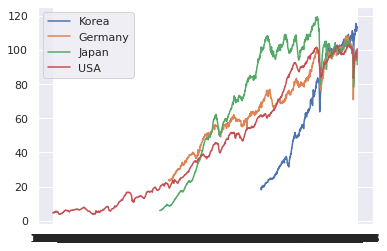

In [6]:
plt.plot(df.kor_pi, label = 'Korea')
plt.plot(df.ger_pi, label = 'Germany')
plt.plot(df.jap_pi, label = 'Japan')
plt.plot(df.usa_pi, label = 'USA')
plt.legend()
plt.show()

#### (2) 최소자승법으로 다음의 모형을 추정하시오.
$$y_{kor} = \beta_0 + \beta_1y_{jp} + \beta_2y_{ger} + \beta_3y_{usa} + \epsilon$$
이 모형에서 발생하는 문제가 무엇이며 이를 어디서 확인할 수 있나요?

In [7]:
test = df.dropna()

y = test['kor_pi']
X = test[['jap_pi', 'ger_pi', 'usa_pi']]
X = sm.add_constant(X)
ols = sm.OLS(y, X)
res = ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 kor_pi   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2064.
Date:                Sun, 22 May 2022   Prob (F-statistic):          4.86e-238
Time:                        16:41:16   Log-Likelihood:                -1354.1
No. Observations:                 392   AIC:                             2716.
Df Residuals:                     388   BIC:                             2732.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0297      6.688     -3.294      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### (3) 각 변수에 대해 단위근 검정을 진행하시오(단, regression = 'c'로 설정).

In [8]:
from statsmodels.tsa.stattools import adfuller

res_kor = adfuller(test['kor_pi'], regression='c')
res_jp = adfuller(test['jap_pi'], regression='c')
res_ger = adfuller(test['ger_pi'], regression='c')
res_usa = adfuller(test['usa_pi'], regression='c')

print("한국 :", res_kor)
print("일본 :", res_jp)
print("독일 :", res_ger)
print("미국 :", res_usa)

한국 : (-0.42049333917553655, 0.9066204844236827, 10, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1425.1384069496098)
일본 : (-3.6547067873104915, 0.004797278514957869, 2, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 1584.1600518119537)
독일 : (-1.6253927990338275, 0.46990321210074454, 2, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 1534.4678568441586)
미국 : (-1.651474615456569, 0.4562714828601092, 2, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 1033.9203090415158)


#### (4) 각 변수들의 원 자료를 변화율로 바꾼 후, 이들에 대해 다시 단위근 검정을 진행하시오(단, regression = 'c'로 설정).

In [9]:
test1 = pd.DataFrame(test.diff().dropna())

print("한국 :", adfuller(test1['kor_pi'], regression = 'c'))
print("일본 :", adfuller(test1['ger_pi'], regression = 'c'))
print("독일 :", adfuller(test1['jap_pi'], regression = 'c'))
print("미국 :", adfuller(test1['usa_pi'], regression = 'c'))

한국 : (-8.015099245495788, 2.149429913990794e-12, 9, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1420.6194182201189)
일본 : (-16.475613063301285, 2.2618419310843533e-29, 1, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 1531.3939406832276)
독일 : (-12.528569389633525, 2.4573646534637354e-23, 1, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 1591.6577121658777)
미국 : (-14.151132808394483, 2.1609047911875402e-26, 1, 389, {'1%': -3.447272819026727, '5%': -2.868998737588248, '10%': -2.5707433189709294}, 1033.5622338537733)


#### (5) 일본의 산업생산지수 원자료(변화율 x)에 대해, acf와 pacf를 그리시오. 이로부터 어떤 결론을 도출할 수 있나요?

<Figure size 432x288 with 0 Axes>

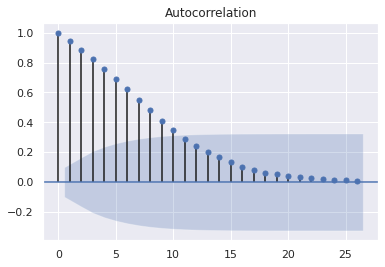

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
plot_acf(test['jap_pi'])
plt.show()

<Figure size 432x288 with 0 Axes>

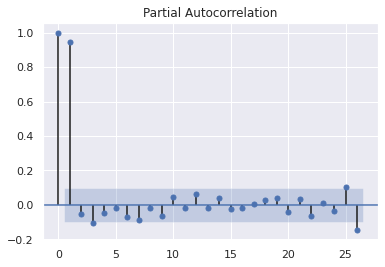

In [11]:
plt.figure()
plot_pacf(test['jap_pi'])
plt.show()

시계열 데이터가 AR의 특성을 띄는 경우 ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소하는 형태를 보인다. 위 두 plot을 통해 일본 산업생산지수 데이터는 AR의 특성을 띈다고 해석할 수 있다.


#### (6) 일본의 산업생산지수를 ARMA(p,q)로 modeling한다고 하자. 이때, AIC와 BIC를 기준으로 최적의 p, q를 도출하시오.

In [12]:
x = np.mat(test['jap_pi'])
x = np.ravel(x, order = 'C')

res = sm.tsa.arma_order_select_ic(x, ic = ["aic", "bic"], trend = "nc")
print(res.aic_min_order)
print(res.bic_min_order)

(1, 0)
(1, 0)


최적의 p는 1, q는 0이다.

#### (7) 위의 결과를 바탕으로 일본의 산업생산지수에 대한 ARMA(p,q) 모형을 만들고, ARMA 모형에서 예측된 값과 실제 값을 산포도로 그리시오. 산포도를 기준으로 판단했을때, 일본의 산업생산지수에 대한 ARMA 모형은 괜찮은 모형입니까?

In [13]:
model = sm.tsa.ARMA(x, (1, 0))
r = model.fit(disp = False)
predict = r.predict()

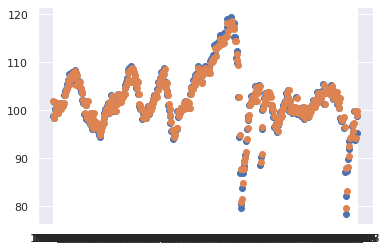

In [14]:
plt.scatter(test.index, test['jap_pi'])
plt.scatter(test.index, predict)
plt.show()

예측된 값과 실제 값의 산포도를 비교하였을 때 거의 일치하는 모양을 보이므로 일본의 산업생산지수에 대한 ARMA 모형은 괜찮은 모형으로 볼 수 있다.